# Etude des avis

In [1]:
import re
import pandas as pd
import string
from collections import defaultdict
from datetime import datetime

from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


# Pré traitements

Ouverture des fichiers

In [2]:
df_review = pd.read_excel('20231027_review.xlsx')

Lemmatiser les commentaires

In [3]:
def stem_text(text):
    # ponctuation
    punct = string.punctuation
    # Mots vides
    st = set(stopwords.words('english'))
    # Racinisation
    stemmer = PorterStemmer()

    # Utilisation d'une expression régulière pour supprimer les émojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub(r'\bthe\b', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'\bi\b', ' ', text, flags=re.IGNORECASE)
    text = re.sub("'", ' ', text)
    text = re.sub("-", ' ', text)
    text = re.sub("/", ' ', text)
    text = re.sub(r"[0-9]+", ' ', text)
    # Transformation de la phrase, sans prendre en compte les stopwords, en mot.
    words = [tok.lower() for tok in word_tokenize(text) if tok not in set(st) and tok not in punct]
    # Racinnation des mots
    racine = [stemmer.stem(mot) for mot in words]
    return ' '.join(racine)


def lemmatise_text(text):
    # ponctuation
    punct = string.punctuation
    # Mots vides
    st = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Utilisation d'une expression régulière pour supprimer les émojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub("'", ' ', text)
    text = re.sub("-", ' ', text)
    text = re.sub("/", ' ', text)
    text = re.sub(r"[0-9]+", ' ', text)
    text = re.sub(r'\bthe\b', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'\bi\b', ' ', text, flags=re.IGNORECASE)
    # Transformation de la phrase, sans prendre en compte les stopwords, en mot.
    words = [tok.lower() for tok in word_tokenize(text) if tok not in set(st) and tok not in punct]
    # Racinnation des mots
    lem = [lemmatizer.lemmatize(mot) for mot in words]

    return ' '.join(lem)


df_review['lemmas_avantage'] = df_review['avantage'].apply(lemmatise_text)
df_review['lemmas_inconvenient'] = df_review['inconvenient'].apply(lemmatise_text)
df_review['stem_avantage'] = df_review['avantage'].apply(stem_text)
df_review['stem_inconvenient'] = df_review['inconvenient'].apply(stem_text)
df_review.head()

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,culture standout people incredibly member focu...,challenge lie ever increasing regulatory lands...,cultur standout peopl incred member focus team...,challeng lie ever increas regulatori landscap ...
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,best part police credit union people absolutel...,there many challenge difficulty always people ...,best part polic credit union peopl absolut ama...,there mani challeng difficulti alway peopl aro...
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff culture great eve...,no challenge,manag realli care staff cultur great everybodi...,no challeng
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience felt welcomed ...,faced,fantast onboard experi felt welcom everyon day...,face
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management o...,sale target challenge time,fantast work cultur support manag opportun get...,sale target challeng time


# Comptage des mots et wordclouds

Comptage de mots par avis

In [4]:
def compte_untexte(text):
    l_mot = text.split()
    counts = {}

    for mot in l_mot:
        counts[mot] = counts.get(mot,0)+1

    return dict(sorted(counts.items(), key=lambda item: item[1],reverse=True))

df_review['compte_avantage'] = df_review['lemmas_avantage'].apply(compte_untexte)
df_review['compte_inconvenient'] = df_review['lemmas_inconvenient'].apply(compte_untexte)
df_review.head()

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient,compte_avantage,compte_inconvenient
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,culture standout people incredibly member focu...,challenge lie ever increasing regulatory lands...,cultur standout peopl incred member focus team...,challeng lie ever increas regulatori landscap ...,"{'focused': 2, 'culture': 1, 'standout': 1, 'p...","{'challenge': 2, 'lie': 1, 'ever': 1, 'increas..."
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,best part police credit union people absolutel...,there many challenge difficulty always people ...,best part polic credit union peopl absolut ama...,there mani challeng difficulti alway peopl aro...,"{'best': 2, 'people': 2, 'team': 2, 'also': 2,...","{'always': 2, 'help': 2, 'there': 1, 'many': 1..."
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff culture great eve...,no challenge,manag realli care staff cultur great everybodi...,no challeng,"{'staff': 2, 'help': 2, 'management': 1, 'real...","{'no': 1, 'challenge': 1}"
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience felt welcomed ...,faced,fantast onboard experi felt welcom everyon day...,face,"{'fantastic': 1, 'onboarding': 1, 'experience'...",{'faced': 1}
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management o...,sale target challenge time,fantast work cultur support manag opportun get...,sale target challeng time,"{'fantastic': 1, 'work': 1, 'culture': 1, 'sup...","{'sale': 1, 'target': 1, 'challenge': 1, 'time..."


#### Création des dictionnaires de mots par entreprise

Cette fonction permet de choisir en entrée le dataframe à utiliser, le nom de l'`entreprise` et le le `choix`.
Chaque avis à des avantages et inconvénients, la variable choix peut prendre en entrée `avantage`, `inconvenient` ou `None` (pour prendre l'avis global).

In [5]:
def somme_entreprise(df_review,entreprise,choix=None):
    sommes = defaultdict(int)

    if choix==None:
      review=pd.concat([df_review["compte_avantage"][df_review.entreprise==entreprise],df_review["compte_inconvenient"][df_review.entreprise==entreprise]])
      for document in review:
          for mot, valeur in document.items():
              sommes[mot] += valeur
      resultat = dict(sommes)
    else:
      choix1="compte_"+choix
      for document in df_review[choix1][df_review.entreprise==entreprise]:
        for mot, valeur in document.items():
          sommes[mot] += valeur
      resultat = dict(sommes)
    return dict(sorted(resultat.items(), key=lambda item: item[1],reverse=True))

#Affichage des 10 premiers mots les plus utilisé dans l'avis
list(somme_entreprise(df_review,"Police Credit Union").items())[:10]

[('work', 10),
 ('team', 7),
 ('help', 7),
 ('staff', 7),
 ('great', 7),
 ('good', 6),
 ('challenge', 6),
 ('culture', 5),
 ('people', 5),
 ('opportunity', 4)]

#### Nuage de mots

Ce nuage de mot permet d'afficher l'avis global d'une entreprise. Cette fonction prend en entrée le nom de l'`entreprise` dont on souhaite voir le wordcloud

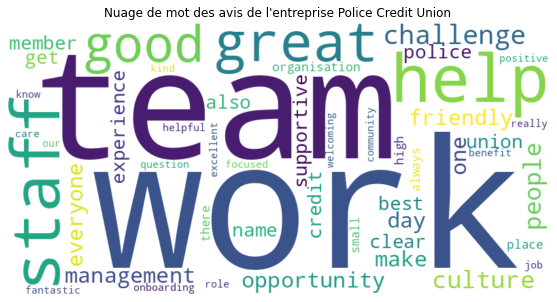

In [6]:
def nuage_de_mots(entreprise):
    # Créez un objet WordCloud
    nuage_de_mots = WordCloud(width=800, height=400, background_color='white',max_words=50)

    resultat=somme_entreprise(df_review,entreprise)
    # Générez le nuage de mots à partir du dictionnaire
    nuage_de_mots.generate_from_frequencies(resultat)

    # Affichez le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(nuage_de_mots, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuage de mot des avis de l'entreprise {entreprise} ")
    # Sauvegardez l'image
    ent=entreprise.replace(" ","_")
    plt.savefig(f"Wordcloud/Wordcloud_{ent}.jpeg")
    plt.show()
nuage_de_mots("Police Credit Union")

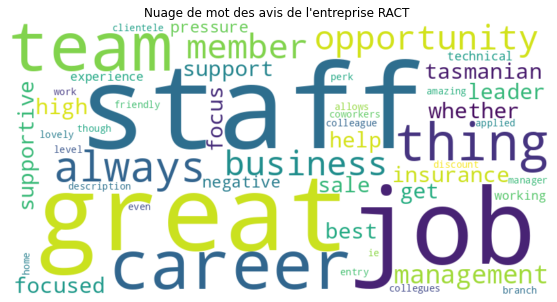

In [7]:
nuage_de_mots("RACT")

Ce nuage de mot permet d'afficher les avis positifs et les avis négatifs  d'une entreprise. Cette fonction prend en entrée le nom de l'`entreprise` dont on souhaite voir le wordcloud

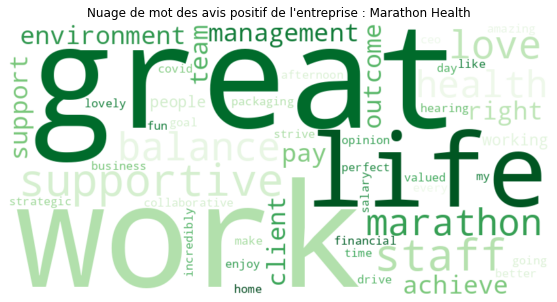

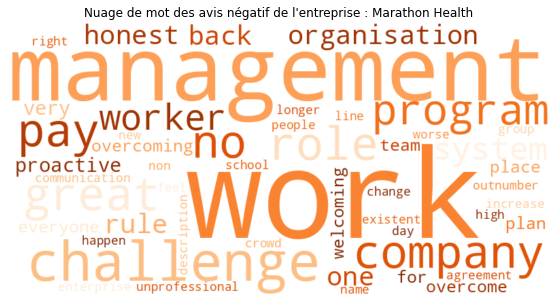

In [8]:
def nuage_de_mots_choix_ent(entreprise):
    # Créez objet WordCloud, un avec couleur verte et un rouge pour positif negatif
    nuage_de_mots_avantage = WordCloud(width=800, height=400, background_color='white',max_words=50,colormap='Greens')
    nuage_de_mots_inconvenient = WordCloud(width=800, height=400, background_color='white',max_words=50,colormap='Oranges')
    #calcul des fréquences
    freq_avantage=somme_entreprise(df_review,entreprise,"avantage")
    freq_inconvenient=somme_entreprise(df_review,entreprise,"inconvenient")
    ent=entreprise.replace(" ","_")
    # Générez le nuage de mots à partir du dictionnaire
    for nuage,freq,titre in [(nuage_de_mots_avantage,freq_avantage,"positif"),(nuage_de_mots_inconvenient,freq_inconvenient,"négatif")]:
        nuage.generate_from_frequencies(freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(nuage, interpolation='bilinear')
        plt.title(f"Nuage de mot des avis {titre} de l'entreprise : {entreprise}")
        plt.axis('off')
        plt.savefig(f"Wordcloud/Wordcloud_{ent}_{titre}.jpeg")
        plt.show()


nuage_de_mots_choix_ent("Marathon Health")

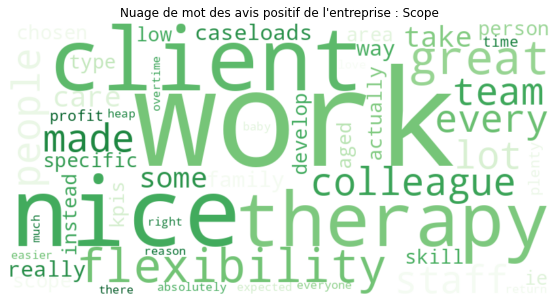

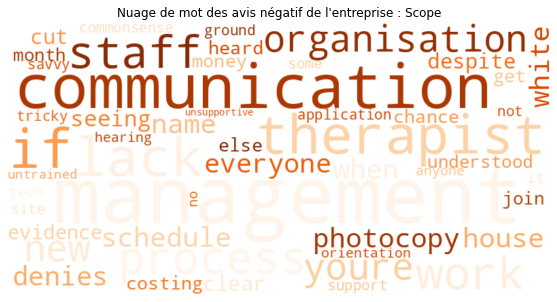

In [9]:
nuage_de_mots_choix_ent("Scope")

### Sentiment dans un texte
Dans cette partie l'objectif est de faire ressortir le sentiment d'un texte et essayer de prédire la note reçu par l'entreprise.

In [10]:
def sentiment_predominant(text):

    # Créer un objet TextBlob à partir du texte
    blob = TextBlob(text)

    # Obtenir la polarité du sentiment (-1 pour négatif, 1 pour positif, 0 pour neutre)
    polarite = blob.sentiment.polarity

    # Interprétation de la polarité
    if polarite > 0:
        sentiment = "positif"
    elif polarite < 0:
        sentiment = "négatif"
    else:
        sentiment = "neutre"

    #print(f"Sentiment prédominant : {sentiment} (polarité : {polarite})")

    return (sentiment, polarite)


df_review['sentiment_avantage_lem'] = df_review['lemmas_avantage'].apply(sentiment_predominant)
df_review['sentiment_inconvenient_lem'] = df_review['lemmas_inconvenient'].apply(sentiment_predominant)
df_review.head()

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient,compte_avantage,compte_inconvenient,sentiment_avantage_lem,sentiment_inconvenient_lem
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,culture standout people incredibly member focu...,challenge lie ever increasing regulatory lands...,cultur standout peopl incred member focus team...,challeng lie ever increas regulatori landscap ...,"{'focused': 2, 'culture': 1, 'standout': 1, 'p...","{'challenge': 2, 'lie': 1, 'ever': 1, 'increas...","(positif, 0.6666666666666666)","(négatif, -0.25)"
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,best part police credit union people absolutel...,there many challenge difficulty always people ...,best part polic credit union peopl absolut ama...,there mani challeng difficulti alway peopl aro...,"{'best': 2, 'people': 2, 'team': 2, 'also': 2,...","{'always': 2, 'help': 2, 'there': 1, 'many': 1...","(positif, 0.5210606060606061)","(positif, 0.2333333333333333)"
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff culture great eve...,no challenge,manag realli care staff cultur great everybodi...,no challeng,"{'staff': 2, 'help': 2, 'management': 1, 'real...","{'no': 1, 'challenge': 1}","(positif, 0.4375)","(neutre, 0.0)"
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience felt welcomed ...,faced,fantast onboard experi felt welcom everyon day...,face,"{'fantastic': 1, 'onboarding': 1, 'experience'...",{'faced': 1},"(positif, 0.39166666666666666)","(neutre, 0.0)"
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management o...,sale target challenge time,fantast work cultur support manag opportun get...,sale target challeng time,"{'fantastic': 1, 'work': 1, 'culture': 1, 'sup...","{'sale': 1, 'target': 1, 'challenge': 1, 'time...","(positif, 0.4666666666666666)","(neutre, 0.0)"


Pour chaque entreprise nous faisons une moyenne pour le positif et le négatif. Puis une moyenne de tous les résultats, ensuite nous allons comparer cette moyenne à la moyenne données par les salariés.

In [11]:
moyenne_positif_entreprises = df_review.groupby('entreprise')['sentiment_avantage_lem'].agg(lambda x: sum(v[1] for v in x) / len(x))
moyenne_positif_entreprises.head()

entreprise
ALS Limited                         0.272121
Accolade Wines                      0.346583
Austin Health                       0.474167
Australian Clinical Labs            0.167545
Australian Department of Defence    0.236583
Name: sentiment_avantage_lem, dtype: float64

In [12]:
moyenne_negatif_entreprises = df_review.groupby('entreprise')['sentiment_inconvenient_lem'].agg(lambda x: sum(v[1] for v in x) / len(x))
moyenne_negatif_entreprises.head()

entreprise
ALS Limited                         0.011644
Accolade Wines                      0.042604
Austin Health                       0.011606
Australian Clinical Labs           -0.069679
Australian Department of Defence    0.042178
Name: sentiment_inconvenient_lem, dtype: float64

Comparaison aux notes données

In [13]:
moyenne_notes = df_review.groupby('entreprise')['note'].agg(lambda x: sum(v for v in x) / len(x))
moyenne_notes = pd.DataFrame(moyenne_notes)
moyenne_notes.head()

,note
entreprise,
ALS Limited,2.3
Accolade Wines,3.0
Austin Health,2.9
Australian Clinical Labs,1.5
Australian Department of Defence,3.3


Concaténer les commentaires négatifs et positifs pour connaitre l'émotion la prédominante.

In [14]:
df_review['Review_Concatenation'] = df_review['lemmas_avantage'] + df_review['lemmas_inconvenient']
df_review.head()

,entreprise,entreprise_id,avantage,inconvenient,job,lieu,note,date,lemmas_avantage,lemmas_inconvenient,stem_avantage,stem_inconvenient,compte_avantage,compte_inconvenient,sentiment_avantage_lem,sentiment_inconvenient_lem,Review_Concatenation
0,Police Credit Union,436554,The culture is a standout. The people are incr...,The challenges lie in the ever-increasing regu...,Risk & Compliance,Adelaide SA 5000,5,2023-10-02T21:26:16.000Z,culture standout people incredibly member focu...,challenge lie ever increasing regulatory lands...,cultur standout peopl incred member focus team...,challeng lie ever increas regulatori landscap ...,"{'focused': 2, 'culture': 1, 'standout': 1, 'p...","{'challenge': 2, 'lie': 1, 'ever': 1, 'increas...","(positif, 0.6666666666666666)","(négatif, -0.25)",culture standout people incredibly member focu...
1,Police Credit Union,436554,The best part of Police Credit Union are the p...,There aren't many challenges or difficulties a...,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T01:36:28.000Z,best part police credit union people absolutel...,there many challenge difficulty always people ...,best part polic credit union peopl absolut ama...,there mani challeng difficulti alway peopl aro...,"{'best': 2, 'people': 2, 'team': 2, 'also': 2,...","{'always': 2, 'help': 2, 'there': 1, 'many': 1...","(positif, 0.5210606060606061)","(positif, 0.2333333333333333)",best part police credit union people absolutel...
2,Police Credit Union,436554,Management really cares about their staff. The...,No challenges at all,Insurance Consultant,Adelaide SA 5000,5,2023-09-07T00:32:28.000Z,management really care staff culture great eve...,no challenge,manag realli care staff cultur great everybodi...,no challeng,"{'staff': 2, 'help': 2, 'management': 1, 'real...","{'no': 1, 'challenge': 1}","(positif, 0.4375)","(neutre, 0.0)",management really care staff culture great eve...
3,Police Credit Union,436554,"Fantastic onboarding experience, and I felt ve...",I haven't faced any,Member Service Officer,Adelaide SA 5000,5,2022-11-09T03:01:21.000Z,fantastic onboarding experience felt welcomed ...,faced,fantast onboard experi felt welcom everyon day...,face,"{'fantastic': 1, 'onboarding': 1, 'experience'...",{'faced': 1},"(positif, 0.39166666666666666)","(neutre, 0.0)",fantastic onboarding experience felt welcomed ...
4,Police Credit Union,436554,Fantastic work culture with supportive managem...,Sales targets can be a challenge at times.,Member Service Officer,Adelaide SA 5000,4,2022-08-08T06:03:09.000Z,fantastic work culture supportive management o...,sale target challenge time,fantast work cultur support manag opportun get...,sale target challeng time,"{'fantastic': 1, 'work': 1, 'culture': 1, 'sup...","{'sale': 1, 'target': 1, 'challenge': 1, 'time...","(positif, 0.4666666666666666)","(neutre, 0.0)",fantastic work culture supportive management o...


Moyenne des notes estimées par entrperise

In [15]:
df_review['sentiment_review'] = df_review['Review_Concatenation'].apply(sentiment_predominant)
moyenne_entreprises = df_review.groupby('entreprise')['sentiment_review'].agg(lambda x: sum(v[1] for v in x) / len(x))
notes_echelle_1_converties = [round((note + 1) * 2.5,1) for note in moyenne_entreprises]
notes_echelle_1_converties[:10]

[2.8, 3.1, 3.1, 2.9, 3.0, 3.2, 3.0, 3.6, 3.0, 2.5]

In [16]:
moyenne_notes['Note_calcule'] = notes_echelle_1_converties

Comparaison des résultats

In [17]:
# Ajoutez une colonne "Comparaison" pour stocker le résultat de la comparaison
moyenne_notes['Comparaison'] = None  # Initialisez la colonne avec des valeurs nulles

# Comparez les deux colonnes et remplissez la colonne "Comparaison" avec les résultats
moyenne_notes.loc[moyenne_notes['note'] > moyenne_notes['Note_calcule'], 'Comparaison'] = 'Plus petit'
moyenne_notes.loc[moyenne_notes['note'] < moyenne_notes['Note_calcule'], 'Comparaison'] = 'Plus grand'
moyenne_notes.loc[moyenne_notes['note'] == moyenne_notes['Note_calcule'], 'Comparaison'] = 'Égal'
moyenne_notes['différence']=moyenne_notes['note']-moyenne_notes['Note_calcule']
moyenne_notes

,note,Note_calcule,Comparaison,différence
entreprise,,,,
ALS Limited,2.3,2.8,Plus grand,-0.5
Accolade Wines,3.0,3.1,Plus grand,-0.1
Austin Health,2.9,3.1,Plus grand,-0.2
Australian Clinical Labs,1.5,2.9,Plus grand,-1.4
Australian Department of Defence,3.3,3.0,Plus petit,0.3
Australian Retirement Trust,4.5,3.2,Plus petit,1.3
AustralianSuper,3.3,3.0,Plus petit,0.3
Auto One,4.0,3.6,Plus petit,0.4
BAE Systems,2.7,3.0,Plus grand,-0.3


In [18]:
moyenne_notes['différence'].mean()

0.1425

Ce traitement nous a permis de determiner la note attribuée par les employés en ayant seulement les avis positifs et négatifs des employés. Au final nous avons une différence moyenne de 0.14 entre la note estimée et la vraie note globale